In [28]:
import pandas as pd
import numpy as np
from natsort import natsorted
import os

def read_and_concatenate_data(folder_path):
    result = pd.DataFrame()

    for dirpath, dirnames, filenames in os.walk(folder_path):
        filenames = natsorted(filenames)
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Check if the item is a file and ends with '.txt'
            if os.path.isfile(file_path) and filename.endswith('.txt'):
                # Read the text file into a DataFrame
                df = pd.read_csv(file_path, sep=';', header=None)
                # Concatenate the current DataFrame with the result
                result = pd.concat([result, df], axis=1, ignore_index=True)

    return result

dtag_folder_path = 'shell_f3_0.1_script_results/dtag_script_results/'
dtap_folder_path = 'shell_f3_0.1_script_results/dtap_script_results/'
cbls_folder_path = 'shell_f3_0.1_script_results/cbls_script_results/'
cbls_m_folder_path = 'shell_f3_0.1_script_results/cbls_m_script_results/'
sebs_folder_path = 'shell_f3_0.1_script_results/sebs_script_results/'

# Call the function for each variable
dtag = read_and_concatenate_data(dtag_folder_path)
dtap = read_and_concatenate_data(dtap_folder_path)
cbls = read_and_concatenate_data(cbls_folder_path)
cbls_m = read_and_concatenate_data(cbls_m_folder_path)
sebs = read_and_concatenate_data(sebs_folder_path)

result_concatenated = pd.concat([dtag, dtap, cbls, cbls_m, sebs], axis=0)

dataset = result_concatenated.to_numpy()

dataset = np.reshape(dataset, (5,3,-1,30))

In [29]:
successful_counts = np.zeros((5,4,6,3))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[algo,j//18,j%18//3,0] += 1
            elif (data[i] == 0):
                successful_counts[algo,j//18,j%18//3,1] += 1
            else:
                successful_counts[algo,j//18,j%18//3,2] += 1


successful_counts.shape

(5, 4, 6, 3)

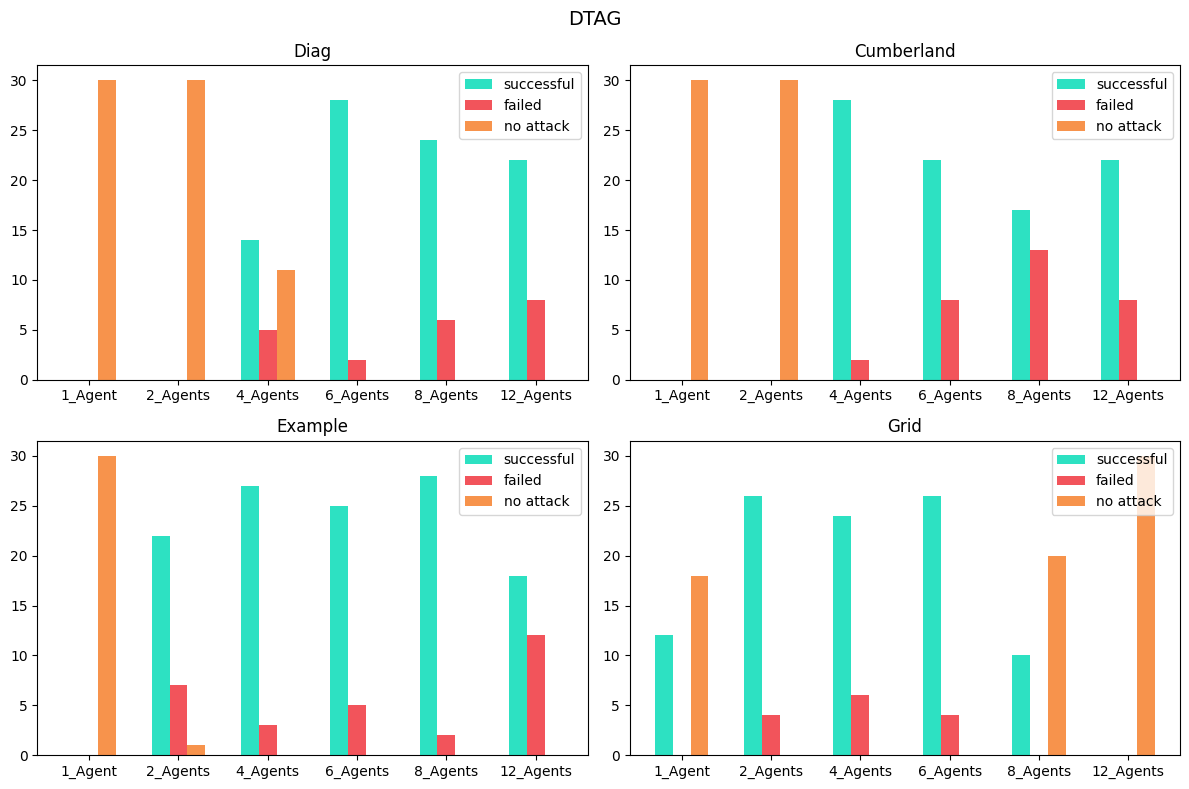

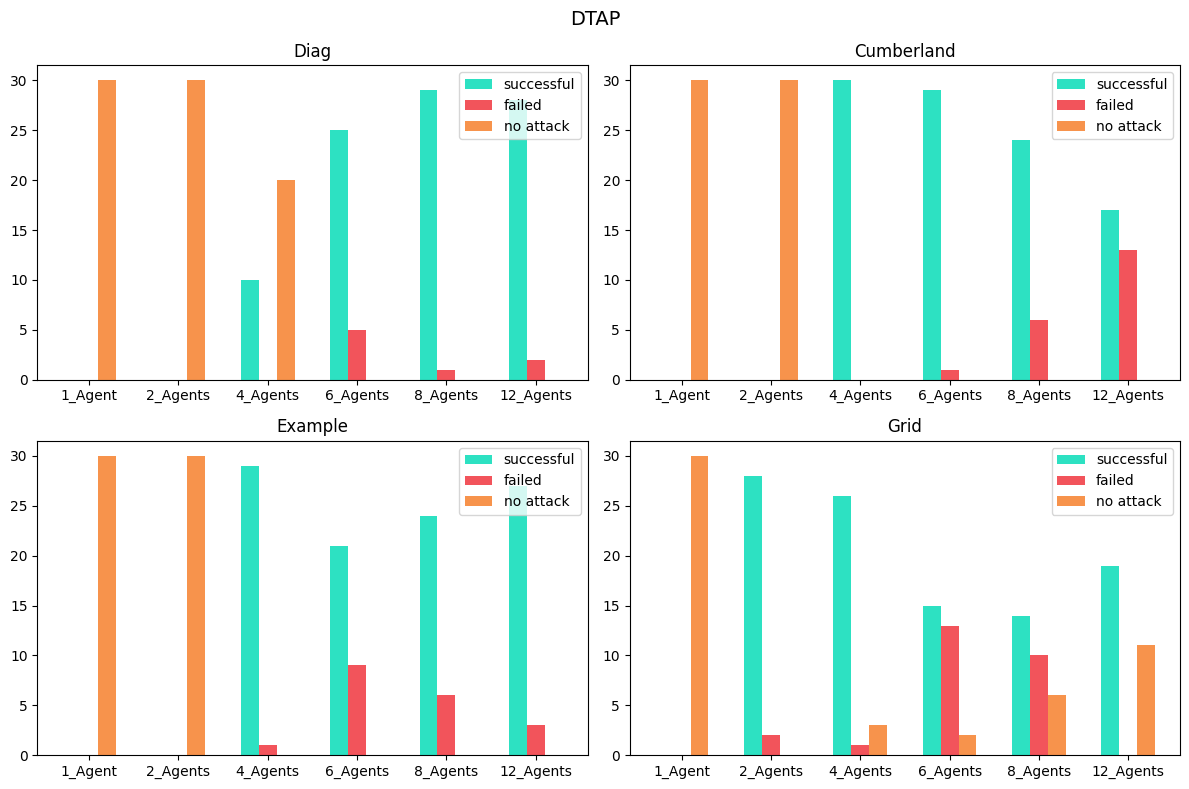

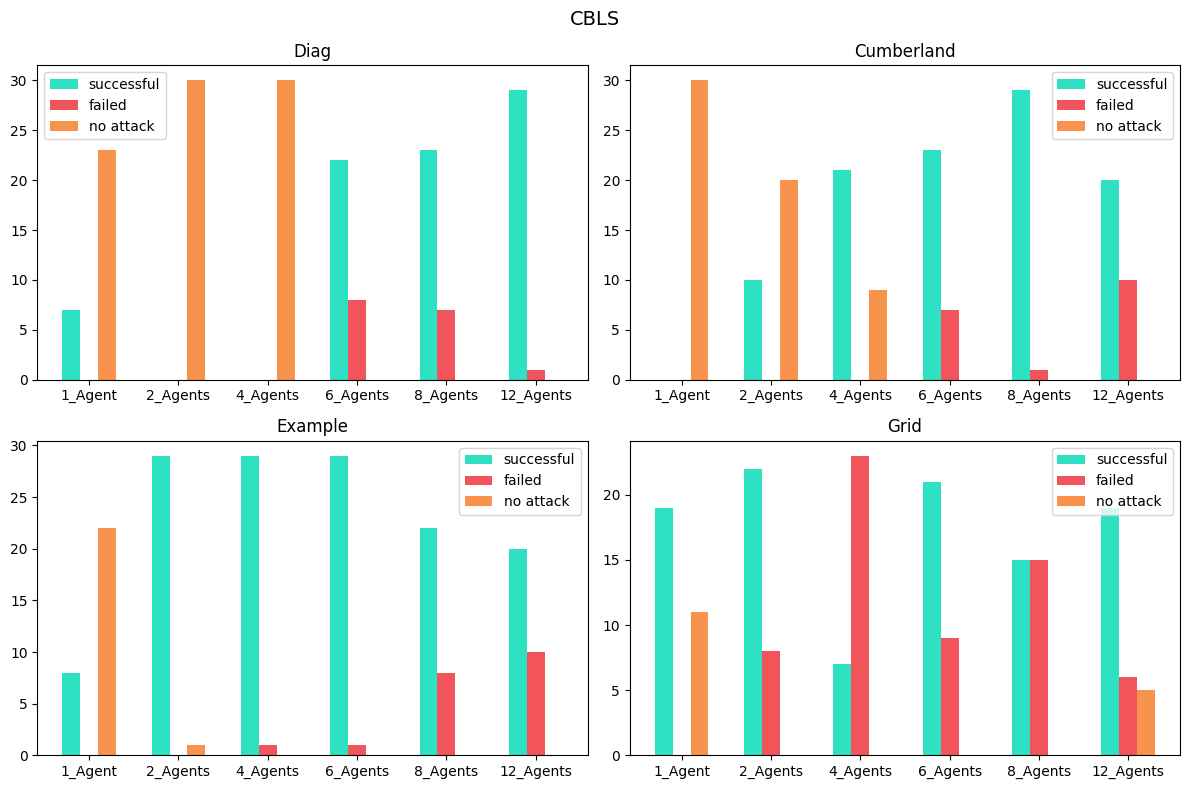

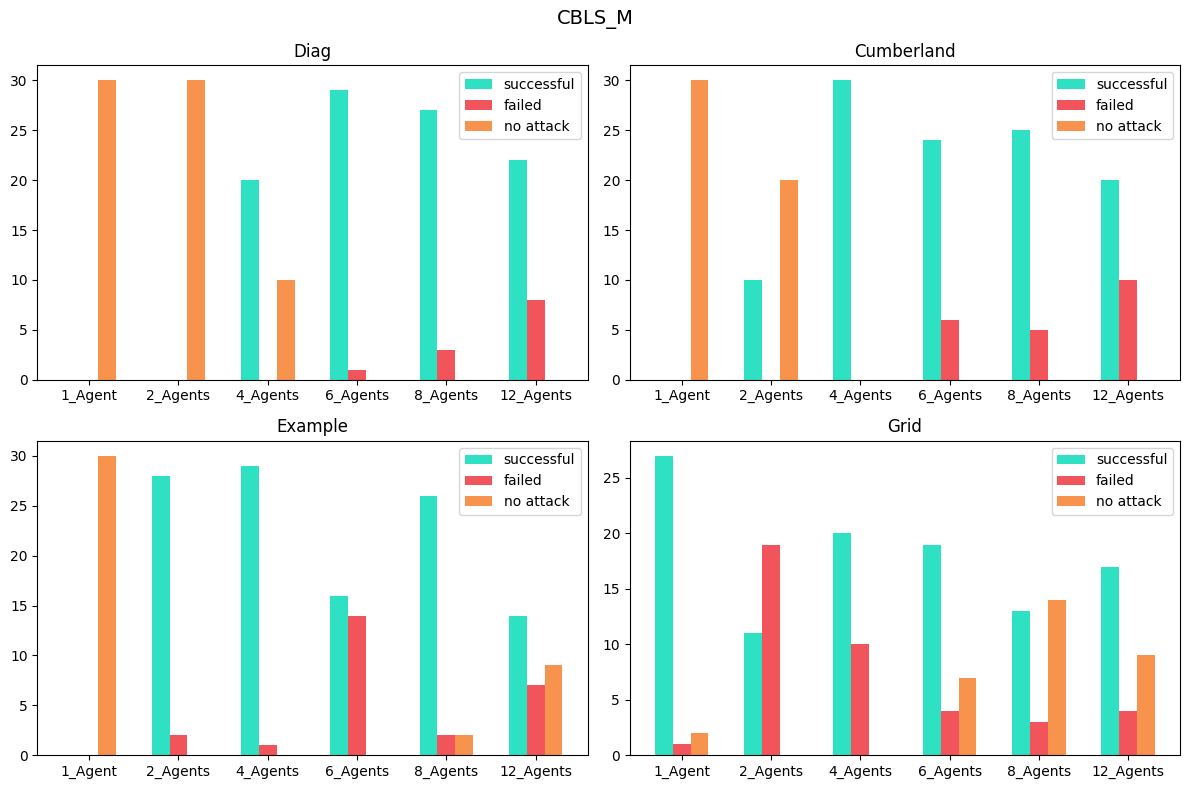

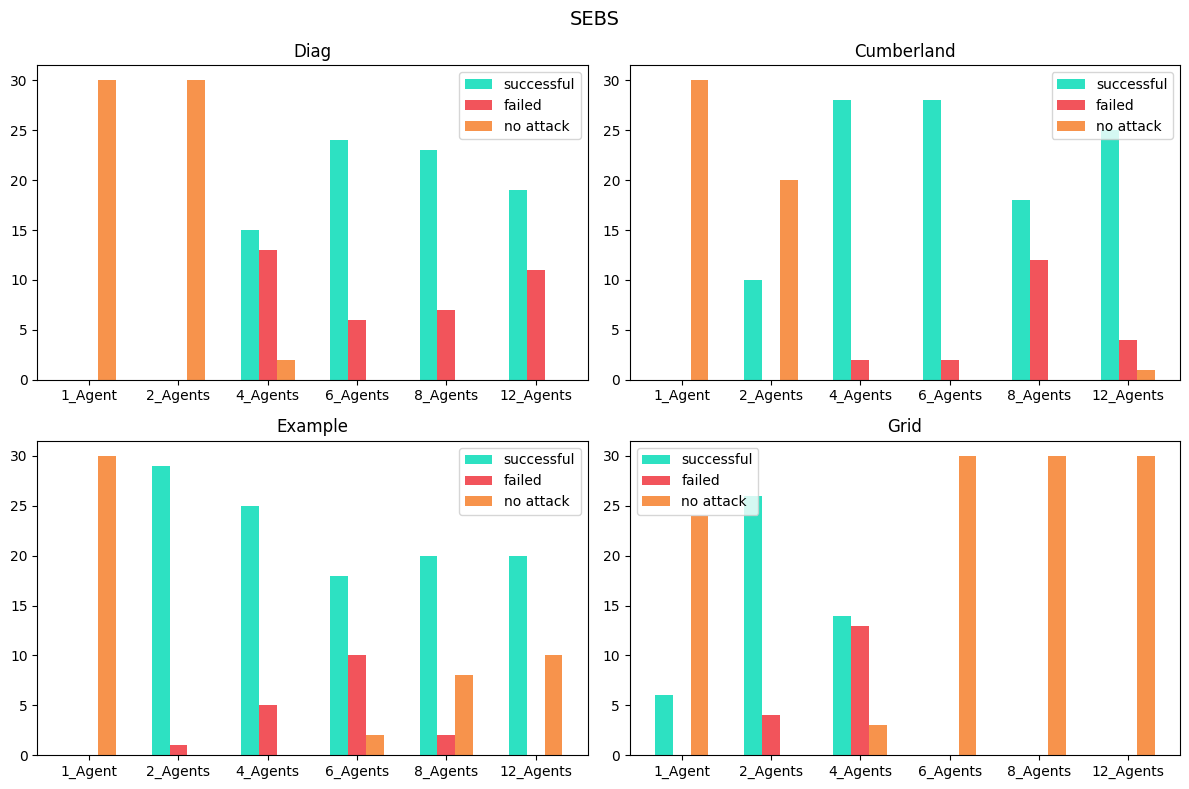

In [23]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 7)
    maps = ['Diag', 'Cumberland', 'Example', 'Grid']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[j, i, :, 0], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[j, i, :, 1], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], width=bar_width, color=color3, label = 'no attack')

        # ax.plot(positions, successful_counts[j, i, :, 0], marker='o', color=color1, label='successful')
        # ax.plot(positions + bar_width + gap, successful_counts[j, i, :, 1], marker='o', color=color2, label='failed')
        # ax.plot(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], marker='o', color=color3, label='no attack')

        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()


In [24]:
average_times = np.zeros((5,4,6))


for algo in range(5):
    for j, data in enumerate(dataset[algo,0,:,:]):
        for i in range(len(data)):
            if str(data[i]) != 'nan':
                average_times[algo,j//18,j%18//3] += (data[i]/(dataset.shape[1]*dataset.shape[-1]))
            else:
                average_times[algo,j//18,j%18//3] += (2000/(dataset.shape[1]*dataset.shape[-1]))

average_times[2][1]

array([2000.        , 1889.66666667, 1859.43333333, 1652.96666667,
       1665.        , 1508.66666667])

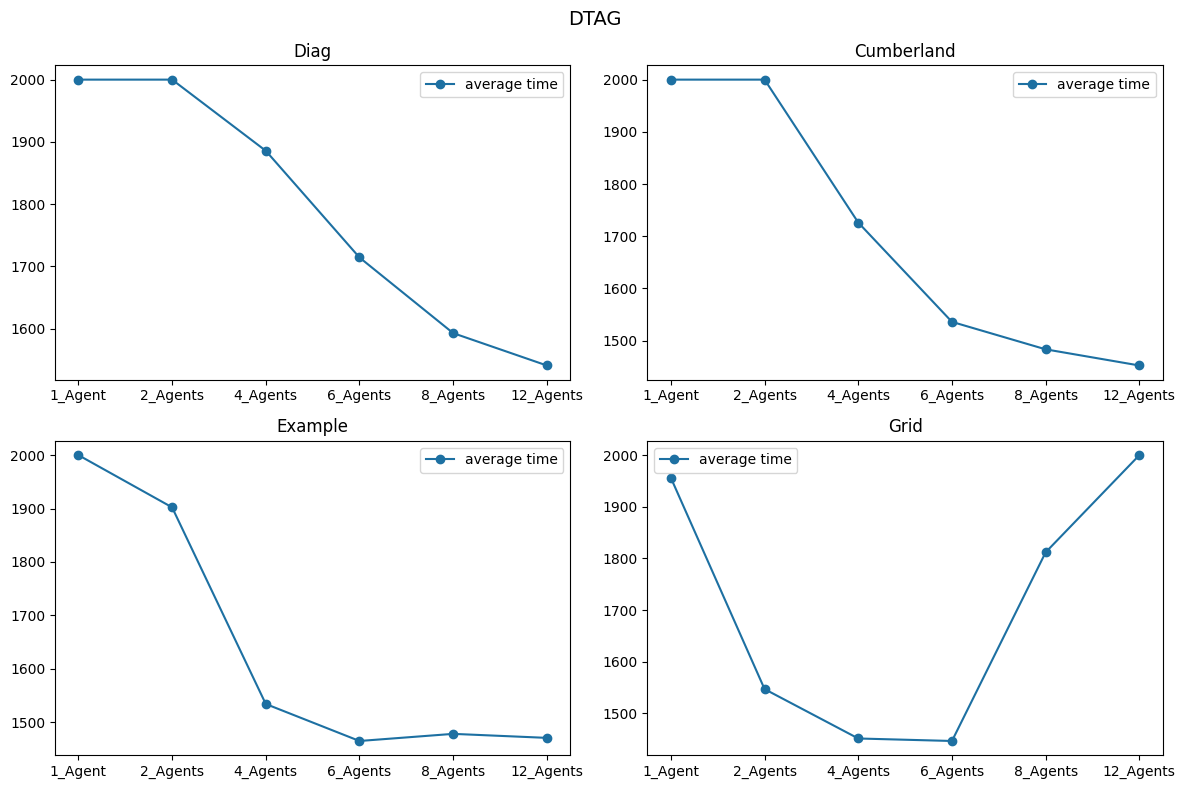

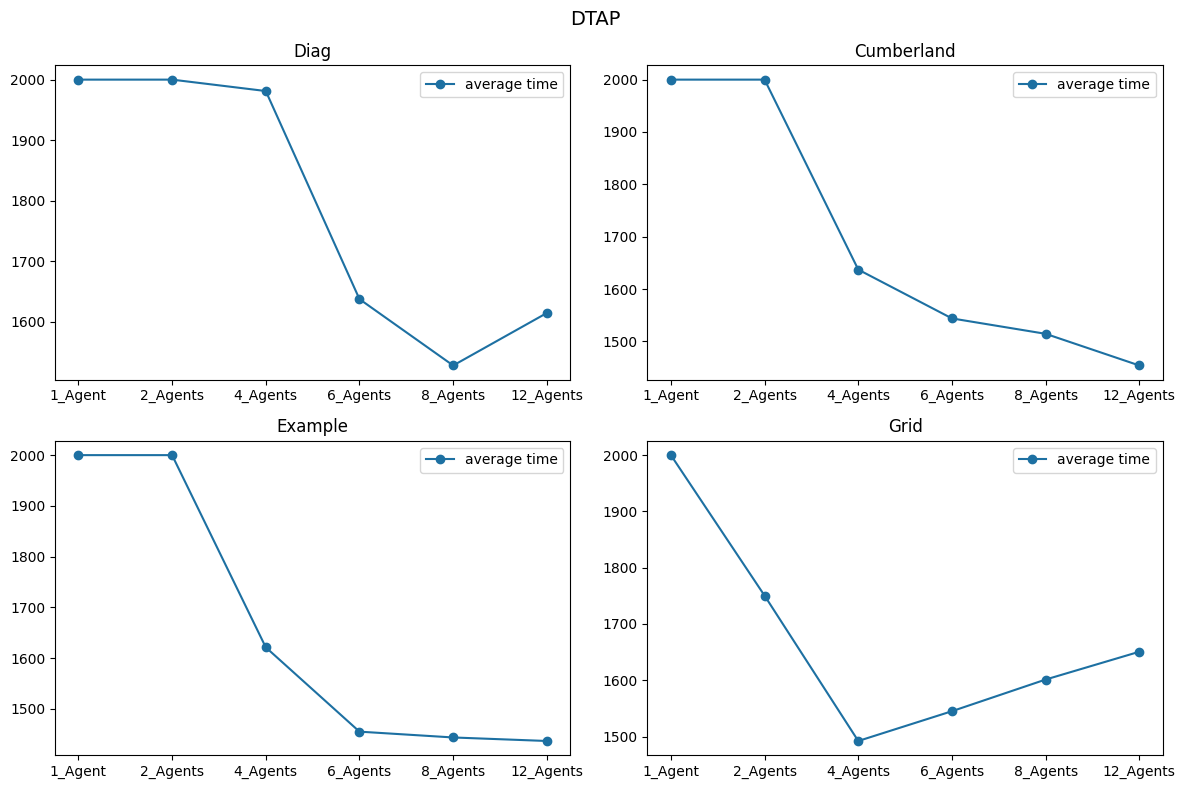

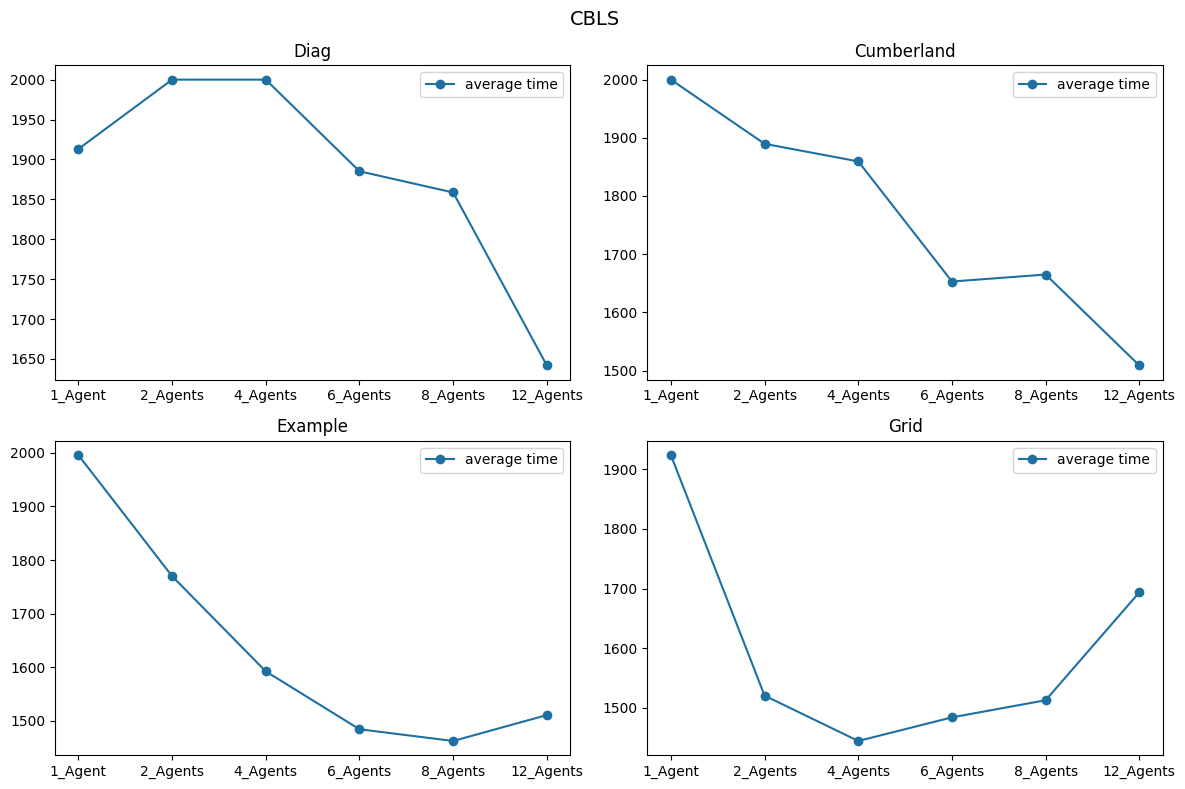

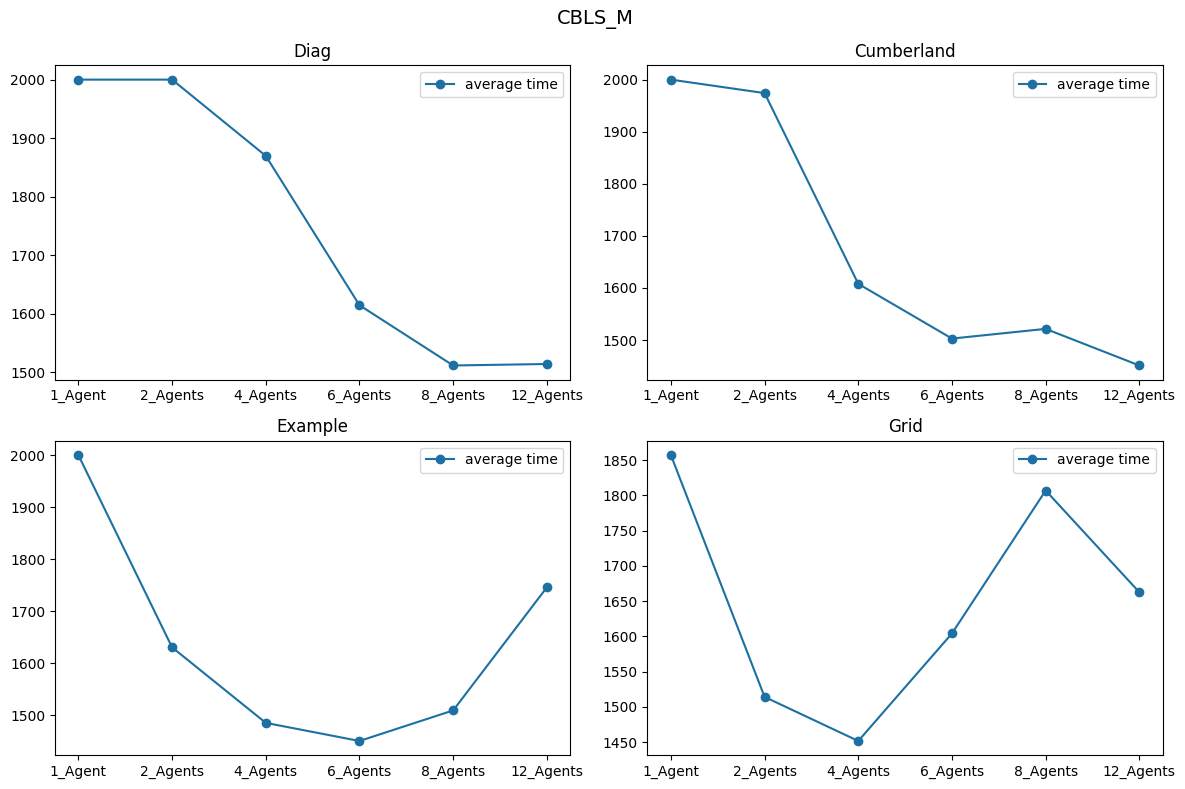

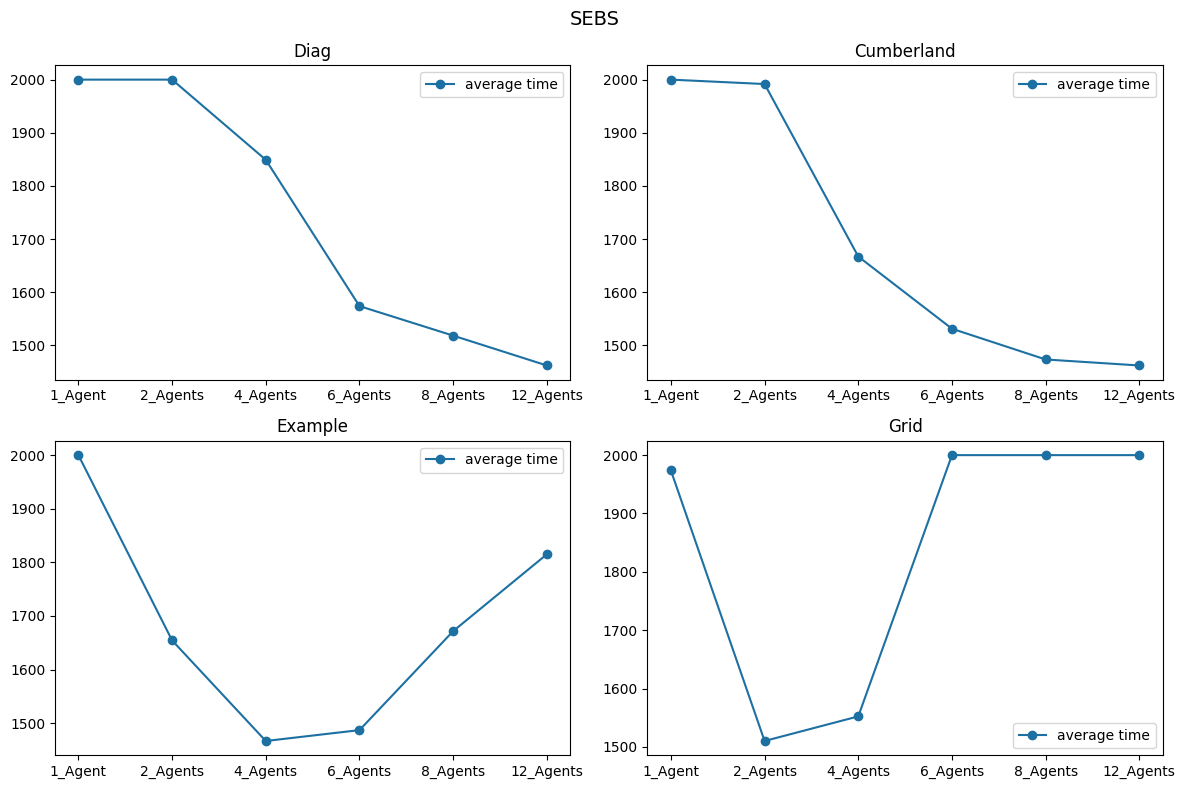

In [25]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 7)
    maps = ['Diag', 'Cumberland', 'Example', 'Grid']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents

        color1 = '#1D70A2'  # Replace with your desired color code

        ax.plot(positions, average_times[j, i, :], marker='o', color=color1, label='average time')

        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()
